In [1]:
import dataset
from sampler import sampler

In [2]:
dset = dataset.Dataset()
dset.load_images_and_masks('../../../Documents/notebooks/kaggle/train/images',
                          '../../../Documents/notebooks/kaggle/train/masks')
print(dset.images.shape,dset.masks.shape)

(4000, 101, 101, 1) (4000, 101, 101, 1)


In [3]:
sampler.sample(dset[0])[0].shape

(3, 224, 224)

(202, 202, 1) (202, 202, 1)
(202, 202) (202, 202)
(256, 256, 1) (256, 256, 1)
(256, 256, 3) (256, 256, 1)
(256, 256, 3) (256, 256, 1)
(3, 256, 256) (1, 256, 256)


C:\Users\Arashi HAISHIMA\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


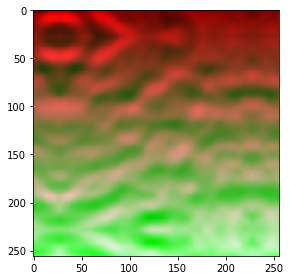

In [19]:
% matplotlib inline
from skimage import io
inputs = sampler.resize202_pair(dset[0])
print(inputs[0].shape,inputs[1].shape)
inputs = sampler.train_augment(inputs)
print(inputs[0].shape,inputs[1].shape)
inputs = sampler.pad256_pair(inputs)
print(inputs[0].shape,inputs[1].shape)
x, t = inputs
x = sampler.repeatx3(x)
inputs = [x,t]
print(inputs[0].shape,inputs[1].shape)
x, t = inputs
x = sampler.add_depth_channels(x)
inputs = [x,t]
print(inputs[0].shape,inputs[1].shape)
inputs = sampler.hwc2chw_pair([x,t])
print(inputs[0].shape,inputs[1].shape)
io.imshow(x)

C:\Users\Arashi HAISHIMA\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


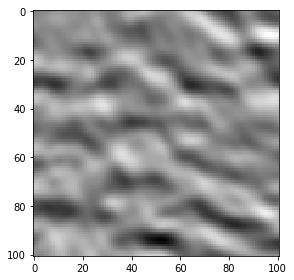

In [5]:
io.imshow(dset[0][0][:,:,0])